Nama Anggota:
1. Buala Leonardo Hulu
2. M. Furqan Fahraby P.
3. Reno Butar Butar

**Clustering**

Clustering adalah metode penganalisaan data, yang sering dimasukkan sebagai salah satu metode Data Mining, yang tujuannya adalah untuk mengelompokkan data dengan karakteristik yang sama ke suatu 'wilayah' yang sama dan data dengan karakteristik yang berbeda ke 'wilayah' yang lain.

**Metode**

Metode pada clustering bermacam-macam. Clustering bisa digunakan dengan metode K-means, Mixture Modelling, Pendekatan Hirarki, SOM dll. Metode yang dipakai pada tugas besar ini adalah k-Means.


**K-Means**

K-means merupakan salah satu algoritma clustering. Tujuan algoritma ini yaitu untuk membagi data menjadi beberapa kelompok. Algoritma ini menerima masukan berupa data tanpa label kelas. Hal ini berbeda dengan supervised learning yang menerima masukan berupa vektor (­x­1 , y1) , (­x­2 , y2) , …, (­x­i , yi), di mana xi merupakan data dari suatu data pelatihan dan yi merupakan label kelas untuk xi .

Pada algoritma pembelajaran ini, komputer mengelompokkan sendiri data-data yang menjadi masukannya tanpa mengetahui terlebih dulu target kelasnya. Pembelajaran ini termasuk dalam unsupervised learning. Masukan yang diterima adalah data atau objek dan k buah kelompok (cluster) yang diinginkan. Algoritma ini akan mengelompokkan data atau objek ke dalam k buah kelompok tersebut. Pada setiap cluster terdapat titik pusat (centroid) yang merepresentasikan cluster tersebut.

Algoritma untuk melakukan K-Means clustering adalah sebagai berikut :

1. Pilih K buah titik centroid secara acak
2. Kelompokkan data sehingga terbentuk K buah cluster dengan titik centroid dari setiap cluster merupakan titik centroid yang telah dipilih sebelumnya
3. Perbaharui nilai titik centroid
4. Ulangi langkah 2 dan 3 sampai nilai dari titik centroid tidak lagi berubah

Proses pengelompokkan data ke dalam suatu cluster dapat dilakukan dengan cara menghitung jarak terdekat dari suatu data ke sebuah titik centroid. Perhitungan Euclidian Distance dapat digunakan untuk menghitung jarak antar 2 buah data. Rumus untuk menghitung jarak tersebut dapat dilihat di link ini
[https://id.wikipedia.org/wiki/K-means#:~:targetText=K%2Dmeans%20merupakan%20salah%20satu,membagi%20data%20menjadi%20beberapa%20kelompok.&targetText=Masukan%20yang%20diterima%20adalah%20data,dalam%20k%20buah%20kelompok%20tersebut.](https://id.wikipedia.org/wiki/K-means#:~:targetText=K%2Dmeans%20merupakan%20salah%20satu,membagi%20data%20menjadi%20beberapa%20kelompok.&targetText=Masukan%20yang%20diterima%20adalah%20data,dalam%20k%20buah%20kelompok%20tersebut.)

Analisis cara kerja nya pada tugas kelompok ini adalah :

1. Kelompok ini menggunakan k-means clustering.
2. Mendapatkan akurasi sebesar 76,02%.


In [0]:
#import library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
#mendownload dataset yang diberikan di classroom

!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-12-07 08:30:55--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.05s   

2019-12-07 08:30:55 (6.87 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [0]:
#membaca dataset yang diberikan tadi
df = pd.read_csv("kc_house_data.csv")

#menampilkan dataset 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [0]:
#melihat adanya berapa baris dan kolom
df.shape

(3165, 21)

In [0]:
#info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 21 columns):
id               3165 non-null int64
date             3165 non-null object
price            3165 non-null float64
bedrooms         3165 non-null int64
bathrooms        3165 non-null float64
sqft_living      3165 non-null int64
sqft_lot         3165 non-null int64
floors           3165 non-null float64
waterfront       3165 non-null int64
view             3165 non-null int64
condition        3165 non-null int64
grade            3165 non-null int64
sqft_above       3165 non-null int64
sqft_basement    3165 non-null int64
yr_built         3165 non-null int64
yr_renovated     3165 non-null int64
zipcode          3165 non-null int64
lat              3165 non-null float64
long             3165 non-null float64
sqft_living15    3164 non-null float64
sqft_lot15       3164 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 519.4+ KB


In [0]:
#deskripsi dataset semua nya
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.165000e+03,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3164.000000,3164.000000
mean,4.645675e+09,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,98077.137757,47.557908,-122.212364,1982.544564,13176.302465
std,2.853857e+09,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,54.169012,0.140785,0.139564,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.200500e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7873.000000
75%,7.355700e+09,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680400,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


In [0]:
#mencari korelasi untuk mengetahui fitur yang berperngaruh
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020586,0.016160,0.006245,0.006509,-0.119387,0.003711,-0.010812,0.026990,-0.040796,0.018157,-0.006035,0.023770,0.027312,0.011153,-0.002739,0.009330,-0.010377,-0.007233,-0.148569
price,0.020586,1.000000,0.292687,0.525410,0.705045,0.074343,0.266345,0.366539,0.443547,0.053563,0.654117,0.599060,0.348385,0.037089,0.122829,-0.054016,0.301174,0.017117,0.607973,0.100527
bedrooms,0.016160,0.292687,1.000000,0.524129,0.563356,0.019957,0.219842,-0.017281,0.071038,0.008733,0.377168,0.464938,0.302777,0.154266,0.021754,-0.141000,-0.002312,0.097718,0.396535,0.026756
bathrooms,0.006245,0.525410,0.524129,1.000000,0.760447,0.051719,0.483868,0.098275,0.192740,-0.084969,0.671816,0.682315,0.311458,0.469411,0.051398,-0.210420,0.029737,0.224612,0.611148,0.103767
sqft_living,0.006509,0.705045,0.563356,0.760447,1.000000,0.116406,0.388018,0.142087,0.304258,-0.032476,0.774177,0.866858,0.463595,0.310565,0.043889,-0.193646,0.074484,0.212006,0.775554,0.188285
sqft_lot,-0.119387,0.074343,0.019957,0.051719,0.116406,1.000000,-0.009937,0.049576,0.093349,0.008939,0.065752,0.138228,-0.012361,0.039262,-0.014342,-0.121655,-0.071822,0.210060,0.157720,0.734030
floors,0.003711,0.266345,0.219842,0.483868,0.388018,-0.009937,1.000000,0.047538,0.029217,-0.226346,0.453994,0.574209,-0.242835,0.398264,0.034701,-0.089467,0.040480,0.188301,0.333560,0.014624
waterfront,-0.010812,0.366539,-0.017281,0.098275,0.142087,0.049576,0.047538,1.000000,0.444111,0.036521,0.096082,0.114460,0.081348,-0.003530,0.068301,0.020302,-0.007285,-0.044505,0.099961,0.046696
view,0.026990,0.443547,0.071038,0.192740,0.304258,0.093349,0.029217,0.444111,1.000000,0.069877,0.232274,0.168941,0.309547,-0.056086,0.090716,0.077557,0.010558,-0.099549,0.284928,0.059748
condition,-0.040796,0.053563,0.008733,-0.084969,-0.032476,0.008939,-0.226346,0.036521,0.069877,1.000000,-0.108518,-0.138635,0.181297,-0.311377,-0.078634,0.004461,-0.019649,-0.119574,-0.076085,0.010200


In [0]:
#menghapus fitur yang tidak berpenagruh berdasarkan korelasi yang tadi dibuat 
df = df.drop(['id','date','sqft_lot15','sqft_lot','zipcode','lat','long','yr_built','yr_renovated'],axis = 1)

In [0]:
#menampilkan dataset dan mengecek fitur yang sudah di hilangkan sudah berhasil
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,2720.0
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0
3161,780000.0,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0
3162,720000.0,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0
3163,415000.0,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0


In [0]:
#melakukan pengisian value yang kosong seperti dilihat di tabel diatas dengan cara ratarata
df['sqft_living15'] = df['sqft_living15'].fillna(df['sqft_living15'].mean())
df['sqft_living15'] = round(df['sqft_living15'])


In [0]:
#mengecek dan melihat dataset kembali
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,2720.0
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0
3161,780000.0,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0
3162,720000.0,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0
3163,415000.0,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0


In [0]:
#menjadikan ke dalam bentuk array
df = df.values[:, 0:12] 

In [0]:
#membaca dataset kembali
df

array([[2.219e+05, 3.000e+00, 1.000e+00, ..., 1.180e+03, 0.000e+00,
        1.340e+03],
       [5.380e+05, 3.000e+00, 2.250e+00, ..., 2.170e+03, 4.000e+02,
        1.690e+03],
       [1.800e+05, 2.000e+00, 1.000e+00, ..., 7.700e+02, 0.000e+00,
        2.720e+03],
       ...,
       [7.200e+05, 2.000e+00, 1.500e+00, ..., 1.340e+03, 5.000e+02,
        1.880e+03],
       [4.150e+05, 3.000e+00, 1.000e+00, ..., 1.360e+03, 0.000e+00,
        2.040e+03],
       [4.800e+05, 4.000e+00, 1.000e+00, ..., 1.040e+03, 1.040e+03,
        1.983e+03]])

In [0]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
#membuat untuk menghitung jarak antar centroid
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

In [0]:
k = 2
maxiter = 50

#Inisialisasi centroid dengan memilih titik data acak
centroids = initialize_clusters(df, k)

#Inisialisasi vektor di mana akan disimpan
#mengisi kelas yang ditugaskan untuk setiap titik data
#menghitung jarak dari setiap centroid
classes = np.zeros(df.shape[0], dtype=np.float64)
distances = np.zeros([df.shape[0], k], dtype=np.float64)

#me-Loop untuk jumlah iterasi maksimum nya
for i in range(maxiter):
    
    #menetapkan semua poin ke centroid terdekat
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, df)
        
    #menentukan keanggotaan kelas untuk semua dengan memilih centroid yang terdekat
    classes = np.argmin(distances, axis=1)
    
    #memperbarui lokasi centroid menggunakan yang baru 
    for c in range(k):
        centroids[c] = np.mean(df[classes == c], 0)

In [0]:
#mencetak centroid
print(centroids)

[[4.65557540e+05 3.33927970e+00 1.99974756e+00 1.94733524e+03
  1.41366543e+00 3.70245709e-03 1.71322787e-01 3.45304611e+00
  7.47357792e+00 1.66917368e+03 2.78161562e+02 1.90098519e+03]
 [1.60529608e+06 4.02577320e+00 3.17139175e+00 3.94904639e+03
  1.75773196e+00 1.03092784e-01 1.36082474e+00 3.55154639e+00
  9.78865979e+00 3.16766495e+03 7.81381443e+02 3.23158247e+03]]


In [0]:
#memasukkan clusters yang berupa array ke dalam variabel klaster berupa tabel
klaster = pd.DataFrame(classes, columns= ['clusters'])

In [0]:
#menampilkan tabel nya
klaster

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3160,0
3161,0
3162,0
3163,0


In [0]:
from google.colab import files #library untuk export dari googlecolab

#hasil klaster nya tadi di export ke dalam format csv
klaster.to_csv('index_c.csv')
files.download('index_c.csv')

In [0]:
#dataset tadi yang dalam bentuk array dibuat kembali menjadi dalam bentuk tabel
df = pd.DataFrame(df, columns= ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'floors',	'waterfront',	'view', 'condition', 'grade',	'sqft_above',	'sqft_basement',	'sqft_living15'])

In [0]:
#membaca dataset 
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1340.0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1690.0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,2720.0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1360.0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,3.0,8.0,1340.0,500.0,1970.0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,4.0,8.0,1620.0,0.0,2440.0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,3.0,8.0,1340.0,500.0,1880.0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,3.0,7.0,1360.0,0.0,2040.0


In [0]:
#menambahkan tabel yang nama nya klaster
df['klaster'] = klaster

In [0]:
#menampilkan dataset yang sudah ada kolom klaster
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,klaster
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1340.0,0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1690.0,0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,2720.0,0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1360.0,0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,3.0,8.0,1340.0,500.0,1970.0,0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,4.0,8.0,1620.0,0.0,2440.0,0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,3.0,8.0,1340.0,500.0,1880.0,0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,3.0,7.0,1360.0,0.0,2040.0,0


In [0]:
#yang nilai klaster nya 1 akan dibuat ke dataset baru
df_baru1 = df.loc[df['klaster'] == 1]

In [0]:
#menampilkan dataset baru yang berupa klaster nilai 1 
df_baru1

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,klaster
5,1225000.0,4.0,4.50,5420.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,4760.0,1
21,2000000.0,3.0,2.75,3050.0,1.0,0.0,4.0,3.0,9.0,2330.0,720.0,4110.0,1
49,1350000.0,3.0,2.50,2753.0,1.0,1.0,2.0,5.0,9.0,2165.0,588.0,2680.0,1
69,1325000.0,5.0,2.25,3200.0,1.0,0.0,0.0,3.0,8.0,1600.0,1600.0,3390.0,1
70,1040000.0,5.0,3.25,4770.0,1.0,0.0,0.0,4.0,11.0,3070.0,1700.0,3530.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,1130000.0,4.0,3.00,3180.0,2.0,0.0,0.0,4.0,9.0,2070.0,1110.0,2720.0,1
3121,1320000.0,4.0,5.25,6110.0,2.0,0.0,0.0,3.0,11.0,6110.0,0.0,4190.0,1
3129,1265000.0,4.0,2.25,2870.0,1.0,0.0,0.0,5.0,8.0,1730.0,1140.0,2370.0,1
3153,1506000.0,4.0,3.25,3660.0,2.5,0.0,0.0,3.0,10.0,3360.0,300.0,3240.0,1


In [0]:
#memilih fitur yang berpengaruh pada price dengan klaster yang nilai nya 1 
df_baru = df_baru1[['sqft_living', 'sqft_basement', 'grade', 'price','klaster']]

In [0]:
#menampilkan dataset nya 
df_baru

,sqft_living,sqft_basement,grade,price,klaster
5,5420.0,1530.0,11.0,1225000.0,1
21,3050.0,720.0,9.0,2000000.0,1
49,2753.0,588.0,9.0,1350000.0,1
69,3200.0,1600.0,8.0,1325000.0,1
70,4770.0,1700.0,11.0,1040000.0,1
...,...,...,...,...,...
3103,3180.0,1110.0,9.0,1130000.0,1
3121,6110.0,0.0,11.0,1320000.0,1
3129,2870.0,1140.0,8.0,1265000.0,1
3153,3660.0,300.0,10.0,1506000.0,1


In [0]:
#menghitung berapa banyaknya baris dan kolom tersebut
df_baru.shape

(194, 5)

In [0]:
from google.colab import files

#dataset tadi di export ke dalam bentuk csv terbaru nya
df_baru.to_csv('klaster.csv') 
files.download('klaster1.csv')

In [0]:
#yang nilai klaster nya 0 akan dibuat ke dataset baru
df_baru0 = df.loc[df['klaster'] == 0]

In [0]:
#menampilkan dataset yang berupa klaster nilai nya 0
df_baru0

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,klaster
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1340.0,0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1690.0,0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,2720.0,0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1360.0,0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,3.0,8.0,1340.0,500.0,1970.0,0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,4.0,8.0,1620.0,0.0,2440.0,0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,3.0,8.0,1340.0,500.0,1880.0,0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,3.0,7.0,1360.0,0.0,2040.0,0


In [0]:
#memilih fitur yang berpengaruh pada price dengan klaster yang nilai nya 0
df_0 = df_baru0[['sqft_living', 'sqft_basement', 'grade', 'price','klaster']]

In [0]:
#menampilkan dataset nya
df_0

,sqft_living,sqft_basement,grade,price,klaster
0,1180.0,0.0,7.0,221900.0,0
1,2570.0,400.0,7.0,538000.0,0
2,770.0,0.0,6.0,180000.0,0
3,1960.0,910.0,7.0,604000.0,0
4,1680.0,0.0,8.0,510000.0,0
...,...,...,...,...,...
3160,1840.0,500.0,8.0,485000.0,0
3161,1620.0,0.0,8.0,780000.0,0
3162,1840.0,500.0,8.0,720000.0,0
3163,1360.0,0.0,7.0,415000.0,0


In [0]:
from google.colab import files

#dataset tadi di export ke dalam bentuk csv terbaru nya
df_bar.to_csv('klaster0.csv') 
files.download('klaster0.csv')

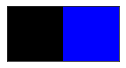

In [0]:
#import library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set ukuran font label pada plot matplotlib
plt.rc('font', size=12)

#set style plot
sns.set_style('white')

#menetapkan palette secara kustom
customPalette = ['#000000', '#0000ff']
sns.set_palette(customPalette)
sns.palplot(customPalette)

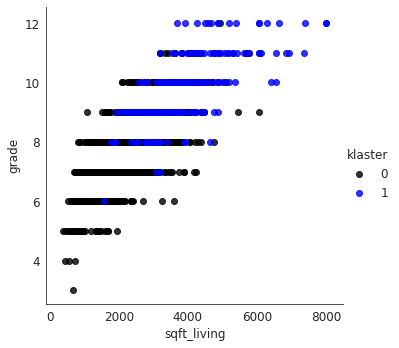

In [0]:
facet = sns.lmplot(data=df, x='sqft_living', y='grade', hue='klaster', 
                   fit_reg=False, legend=True, legend_out=True)

In [0]:
#menghitung akurasi dengan library silhouette score

from sklearn.metrics import silhouette_score
score = silhouette_score(df, df['klaster'], metric='euclidean') #akurasi dengan metode silhouetta metrik euclidean
score

0.7602535033546145